In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [4]:
df = pd.read_csv('C:/Users/admin/Downloads/predict_covidcases/owid-covid-data.csv')

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
df.shape

(86436, 59)

In [7]:
df.nunique()

iso_code                                   219
continent                                    6
location                                   219
date                                       492
total_cases                              45771
new_cases                                11757
new_cases_smoothed                       22475
total_deaths                             17458
new_deaths                                2770
new_deaths_smoothed                       6247
total_cases_per_million                  65222
new_cases_per_million                    37299
new_cases_smoothed_per_million           42056
total_deaths_per_million                 40492
new_deaths_per_million                    7179
new_deaths_smoothed_per_million           8510
reproduction_rate                          372
icu_patients                              2382
icu_patients_per_million                  5020
hosp_patients                             4659
hosp_patients_per_million                 8326
weekly_icu_ad

In [8]:
df['date']= pd.to_datetime(df['date'])

In [9]:
df.drop_duplicates()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86431,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86432,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86433,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86434,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [163]:
len(df)

86436

In [15]:
df.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

In [10]:
df = df[df['iso_code']=='OWID_WRL']

In [11]:
df.shape

(471, 59)

In [12]:
total=df[['date','total_cases']]

In [13]:
total.head()

,date,total_cases
84745,2020-01-22,557.0
84746,2020-01-23,655.0
84747,2020-01-24,941.0
84748,2020-01-25,1433.0
84749,2020-01-26,2118.0


In [14]:
total.reset_index(drop=True, inplace=True)

In [15]:
total.head()

,date,total_cases
0,2020-01-22,557.0
1,2020-01-23,655.0
2,2020-01-24,941.0
3,2020-01-25,1433.0
4,2020-01-26,2118.0


In [185]:
total.shape

(471, 2)

In [16]:
total['id']=total.index +1

<ipython-input-16-822e88380ef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['id']=total.index +1


In [191]:
total.head()

,date,total_cases,id
0,2020-01-22,557.0,1
1,2020-01-23,655.0,2
2,2020-01-24,941.0,3
3,2020-01-25,1433.0,4
4,2020-01-26,2118.0,5


In [17]:
data=total[['id','total_cases']]

In [18]:
data.head()

,id,total_cases
0,1,557.0
1,2,655.0
2,3,941.0
3,4,1433.0
4,5,2118.0


In [208]:
data['total_cases'][470]

156070356.0

In [19]:
x = np.array(data['id']).reshape(-1,1)
y = np.array(data['total_cases']).reshape(-1,1)


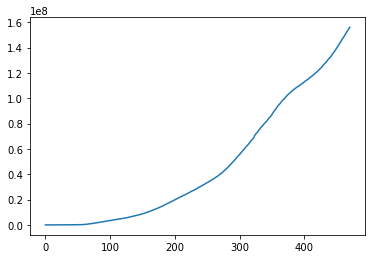

In [20]:
plt.plot(y)
plt.show()

In [21]:
polyfeat = PolynomialFeatures(degree=3)

In [22]:
x = polyfeat.fit_transform(x)


In [23]:
model = linear_model.LinearRegression()

In [24]:
model.fit(x,y)

LinearRegression()

In [25]:
accuracy=model.score(x,y)

In [26]:
round(accuracy*100,3)

99.665

In [27]:
y0=model.predict(x)


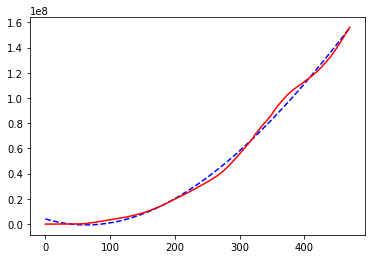

In [28]:
plt.plot(y0,'--b')
plt.plot(y,'-r')
plt.show()

In [29]:
days=1
data['id'].max()

471

In [30]:
print('Prediction-cases after one days :')
y1 = polyfeat.fit_transform([[471+days]])
print(int(model.predict(y1))/1000000,'Millions')

Prediction-cases after one days :
156.3368 Millions
